# Vehicle Classification

## Exploratory Data Analysis


In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd


### Load dataset

In [2]:
columns_name = ['image_name','x1','y1','x2','y2','class','image_width','image_height']
annotations_train=pd.read_csv('../data/SKU110K_fixed/annotations/annotations_train.csv',names=columns_name)
annotations_val= pd.read_csv('../data/SKU110K_fixed/annotations/annotations_val.csv',names=columns_name)
annotations_test= pd.read_csv('../data/SKU110K_fixed/annotations/annotations_test.csv',names=columns_name)


In [3]:
annotations_train

,image_name,x1,y1,x2,y2,class,image_width,image_height
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024
...,...,...,...,...,...,...,...,...
1208477,train_999.jpg,422,2386,675,2542,object,2336,4160
1208478,train_999.jpg,427,2581,667,2715,object,2336,4160
1208479,train_999.jpg,699,2365,823,2474,object,2336,4160
1208480,train_999.jpg,1849,1678,2108,1769,object,2336,4160


In [4]:
training_samples = len(annotations_train.image_name)

val_samples = len(annotations_val.image_name)

test_samples = len(annotations_test.image_name)

print(f'Our dataset has {training_samples} training samples, {val_samples} Val samples, {test_samples} test samples')

Our dataset has 1208482 training samples, 90968 Val samples, 431546 test samples


## Working with images and OpenCV

In [5]:
# Load an image
img = cv2.imread('../data/SKU110K_fixed/images/train_0.jpg')

print(f'Image type: {type(img)}')
print(f'Image shape: {img.shape} (Height x Width x Channels)')
print(f'Image min value: {img.min()}')
print(f'Image max value: {img.max()}')


Image type: <class 'numpy.ndarray'>
Image shape: (3024, 3024, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


In [ ]:
# Display
plt.imshow(img)
plt.show()

**Important Note:** OpenCV uses BGR format while matplotlib uses RGB.

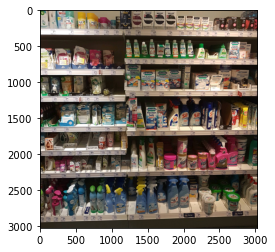

In [ ]:
# Convert from RGB to RGB first
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Then display the converted image
plt.imshow(img_rgb)
plt.show()

## Load and display some images and their label

In [ ]:
annotations_train.head()


,image_name,x1,y1,x2,y2,class,image_width,image_height
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024


In [ ]:
values = annotations_train[annotations_train['image_name'] == 'train_0.jpg'][['x1','x2','x2','y2']].to_numpy()
for bbox in values:
    print(bbox)

[208 422 422 814]
[1268 1365 1365 2209]
[1135 1261 1261 2166]
[1045 1122 1122 2258]
[ 976 1040 1040 2177]
[ 863  937  937 2194]
[ 772  843  843 2244]
[ 659  724  724 2222]
[ 568  645  645 2198]
[ 488  558  558 2257]
[ 413  481  481 2259]
[ 367  406  406 2259]
[ 280  366  366 2248]
[ 204  276  276 2241]
[  83  185  185 2247]
[   3   71   71 1944]
[1128 1213 1213 1929]
[1033 1120 1120 1847]
[1120 1269 1269  265]
[1048 1115 1115  262]
[ 954 1049 1049  261]
[833 942 942 257]
[651 754 754 273]
[522 651 651 271]
[1370 1488 1488 2210]
[356 472 472 261]
[114 236 236 261]
[  8 111 111 262]
[ 378  506  506 1894]
[ 704  813  813 1827]
[ 814  912  912 1942]
[ 923 1014 1014 1905]
[235 356 356 263]
[1491 1615 1615 2188]
[1620 1717 1717 2233]
[1718 1888 1888 2224]
[1018 1188 1188 2838]
[1204 1323 1323 2585]
[1328 1484 1484 2840]
[1484 1615 1615 2839]
[1624 1755 1755 2677]
[1764 1920 1920 2757]
[ 897 1017 1017 2827]
[1923 2079 2079 2759]
[2259 2414 2414 2832]
[2199 2346 2346 2446]
[2415 2522 2522 2659

In [ ]:
for bbox in annotations_train[annotations_train['image_name']=='train_0.jpg'][['x1', 'y1', 'x2', 'y2']].to_numpy().tolist():
    print(bbox[0])

In [ ]:
def display_images(img_name,df):
    img = cv2.imread(os.path.join('../data/SKU110K_fixed/images', img_name))
    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(f'Image type: {type(img)}')
    print(f'Image shape: {img.shape} (Height x Width x Channels)')
    print(f'Image min value: {img.min()}')
    print(f'Image max value: {img.max()}')
    values = df[df['image_name'] == img_name][['x1','y1','x2','y2']].to_numpy().tolist()
    for bbox in values:
        start_points = (bbox[0],bbox[1])
        ends_points = (bbox[2],bbox[3])
        color = (255,255,0)
        cv2.rectangle(im_rgb,start_points,ends_points,color=color,thickness=10)

    plt.imshow(im_rgb)
    plt.title(f'{img_name}')
    plt.show()

Image type: <class 'numpy.ndarray'>
Image shape: (3024, 3024, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


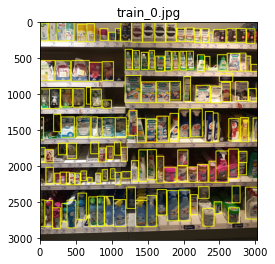

In [ ]:
display_images('train_0.jpg',annotations_train)

Image type: <class 'numpy.ndarray'>
Image shape: (3024, 3024, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


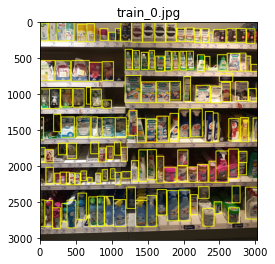

Image type: <class 'numpy.ndarray'>
Image shape: (3264, 2448, 3) (Height x Width x Channels)
Image min value: 0
Image max value: 255


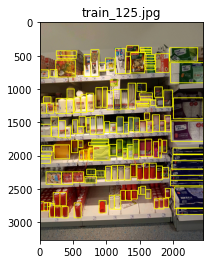

In [ ]:
random_number=[0,125]
for n in random_number:
    display_images(f'train_{n}.jpg',annotations_train)